## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

In [4]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
import xgboost as xgb


## General info About data

In [5]:
df= pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [7]:
df.shape

(303, 14)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [10]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
print("Total Observations: " + str(df.shape))

df = df.drop_duplicates()

print("Total Observations After Removing Duplicates: " + str(df.shape))

Total Observations: (303, 14)
Total Observations After Removing Duplicates: (302, 14)


In [12]:
df.loc[:, "slope"] = df.loc[:, "slope"].map({0: "downsloping", 1: "flat", 2: "upsloping"})
df.loc[:, "thal"] = df.loc[:, "thal"].map({1: "fixed_effect", 2: "normal", 3: "reversable_defect", 0: "else"})

c:\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## Target Distribution

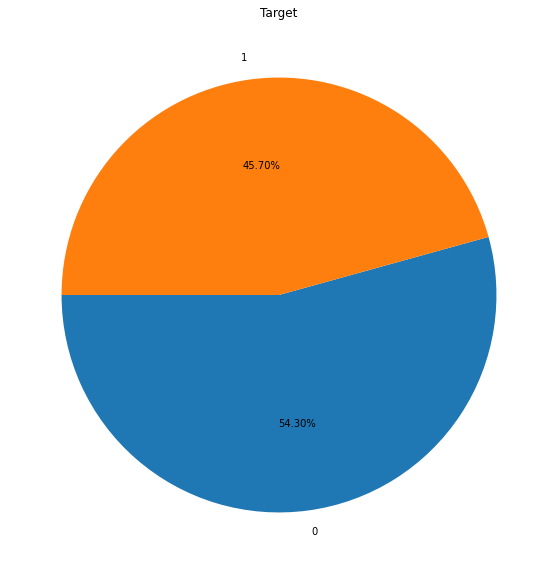

In [13]:
fig, ax = plt.subplots(figsize = (12, 10))
ax.pie(df.target.value_counts(), labels=["0", "1"], autopct='%1.2f%%', startangle=180)
ax.set_title("Target")
plt.show()

Target value's distribution is 54.3% - 45.7%. It is balanced. So, we don't have to use stratification techniques for cross validation and splitting the data, or we don't need to applying sampling to the data.



# EDA

## Categorical Features

In [14]:
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

In [15]:
def count_percentage(df, col, hue):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))
    order = sorted(df[col].unique())
    
    sns.countplot(col, data = df, hue = hue, ax = ax1, order = order).set_title("Counts For Feature:\n" + col)

    df_temp = df.groupby(col)[hue].value_counts(normalize = True).\
    rename("percentage").\
    reset_index()
    
    fig = sns.barplot(x = col, y = "percentage", hue = hue, data = df_temp, ax = ax2, order = order)
    fig.set_ylim(0,1)
    
    fontsize = 14 if len(order) <= 10 else 10
    for p in fig.patches:
        
        txt = "{:.1f}".format(p.get_height() * 100) + "%"
        txt_x = p.get_x() 
        txt_y = p.get_height()
        fig.text(txt_x + 0.125, txt_y + 0.02,txt, fontsize = fontsize)

    ax2.set_title("Percentages For Feature: \n" + col)


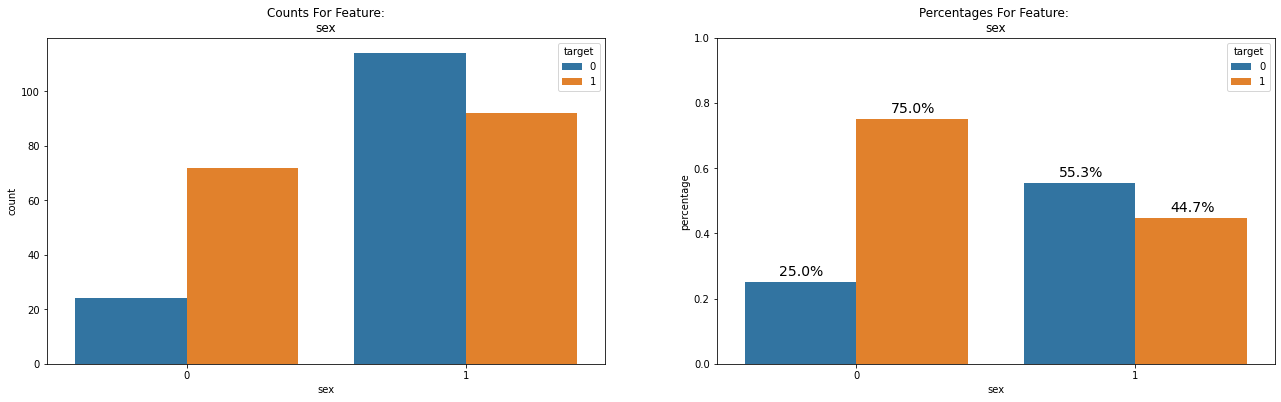

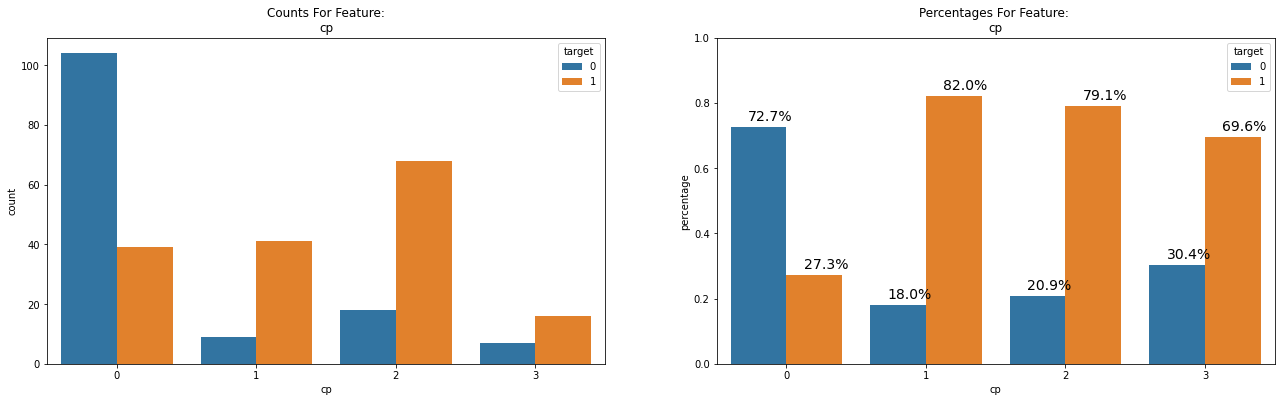

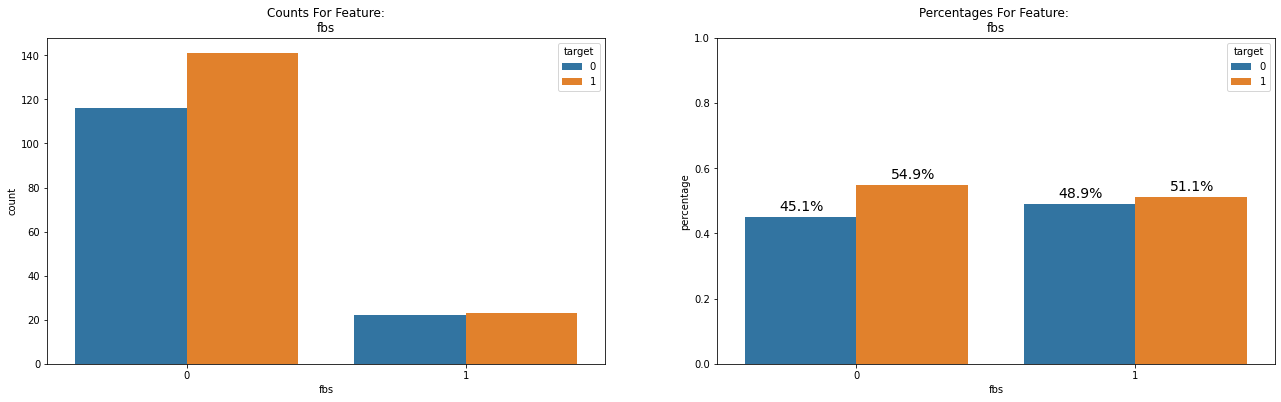

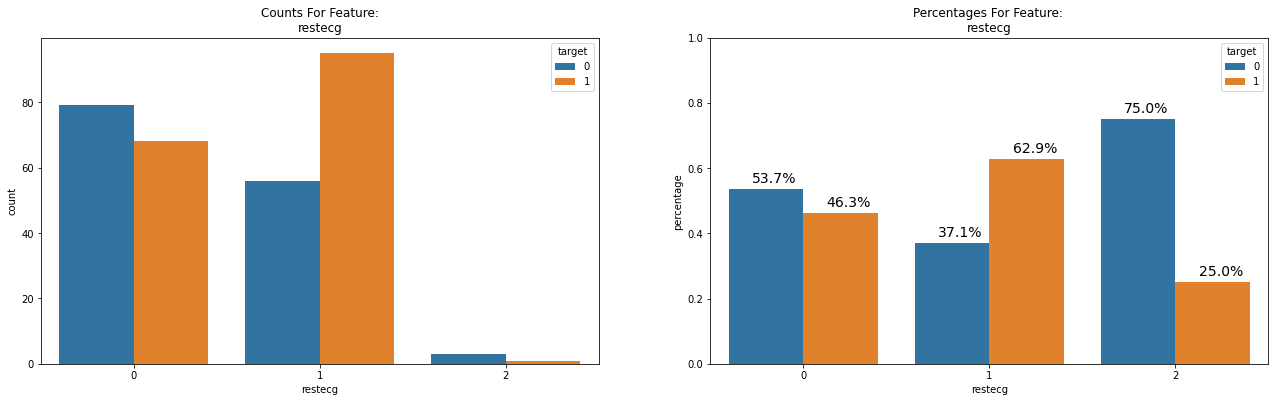

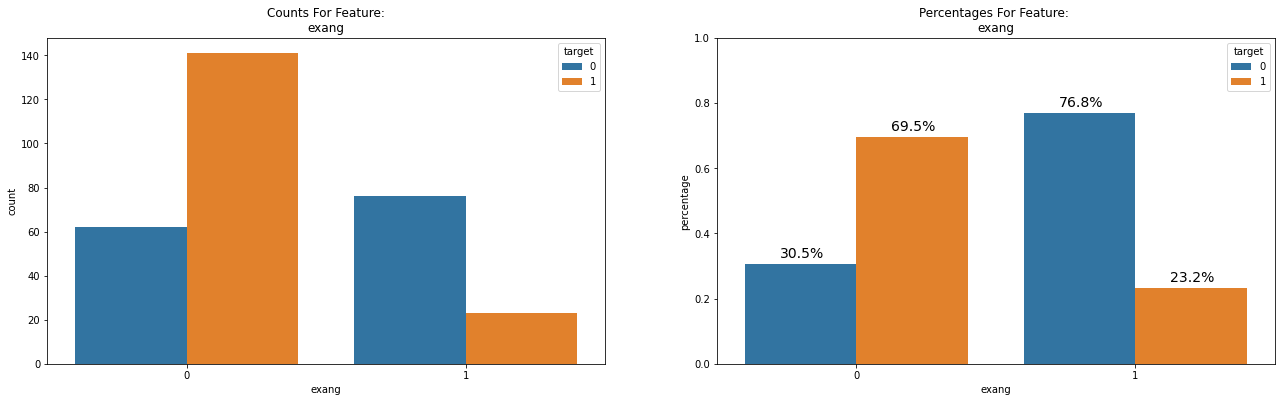

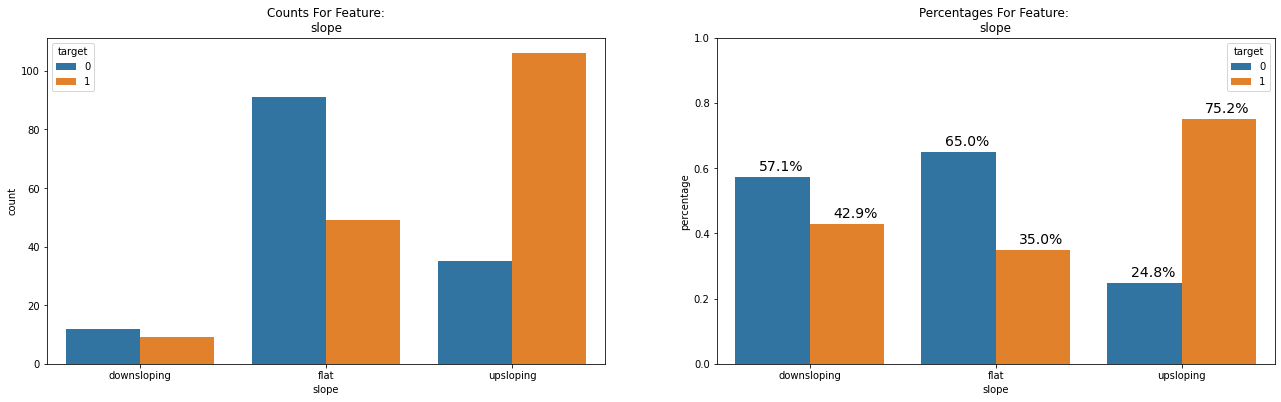

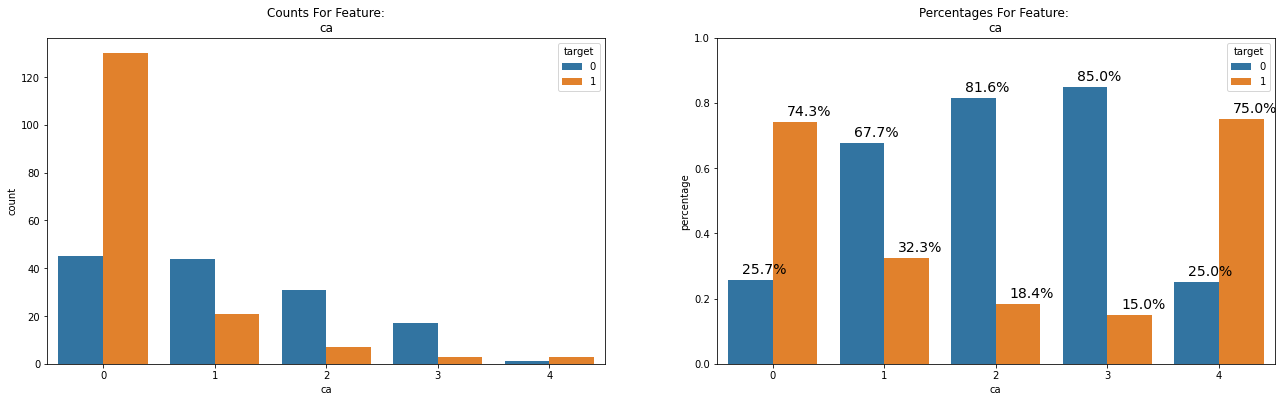

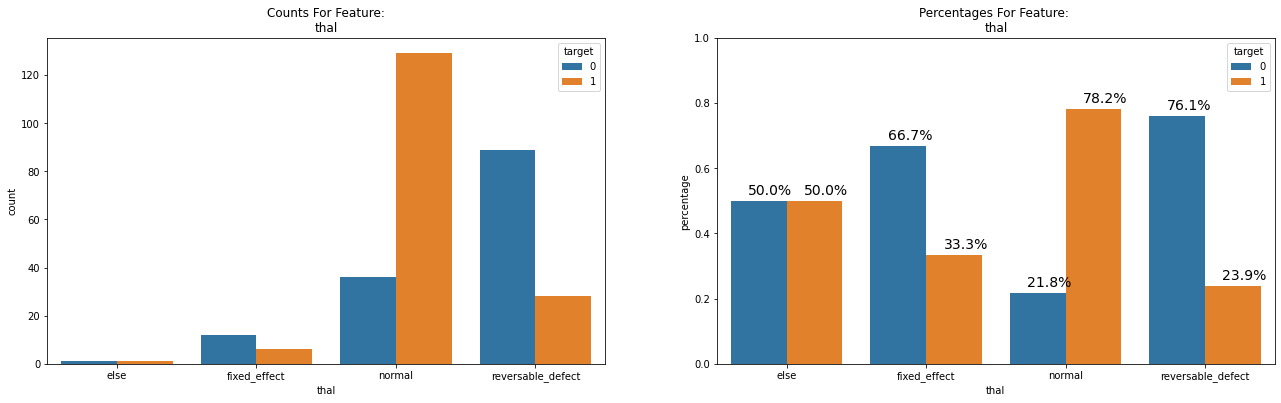

In [16]:
for col in cat_cols:
    count_percentage(df, col, "target")

`Observations: `

`sex:` Really effective feature. Male's target value is 75%, female's target value is 45%

`cp:` If a person doesn't have asymptomatic chest pain (encoded as 0), target value is at least 70%

`fbs:` This feature looks like ineffective. Target's values are 55% and 51% for two option.

`restecg:` Target values are 46%, 63% and 25%. This variable could be useful

`exang:` Really effective feature. 69% - 23%

`slope:` 43, 35 and 75 percent. It could be also useful.

`thal:` 50-33-78-24. It could be also useful.

# Numerical Features

## Numerical vs Target

In [21]:
def feature_dist_clas(df, col, hue):
    fig, axes = plt.subplots(1, 4, figsize = (25, 5))
    order = sorted(df[hue].unique())

    sns.histplot(x = col, hue = hue, data = df, ax = axes[0])
    sns.kdeplot(x = col, hue = hue, data = df, fill = True, ax = axes[1])
    sns.boxplot(y = col, hue = hue, data = df, x = [""] * len(df), ax = axes[2])
    sns.violinplot(y = col, hue = hue, data = df, x = [""] * len(df), ax = axes[3])
    
    fig.suptitle("For Feature:  " + col)
    axes[0].set_title("Histogram For Feature " + col)
    axes[1].set_title("KDE Plot For Feature " + col)   
    axes[2].set_title("Boxplot For Feature " + col)   
    axes[3].set_title("Violinplot For Feature " + col)   
    

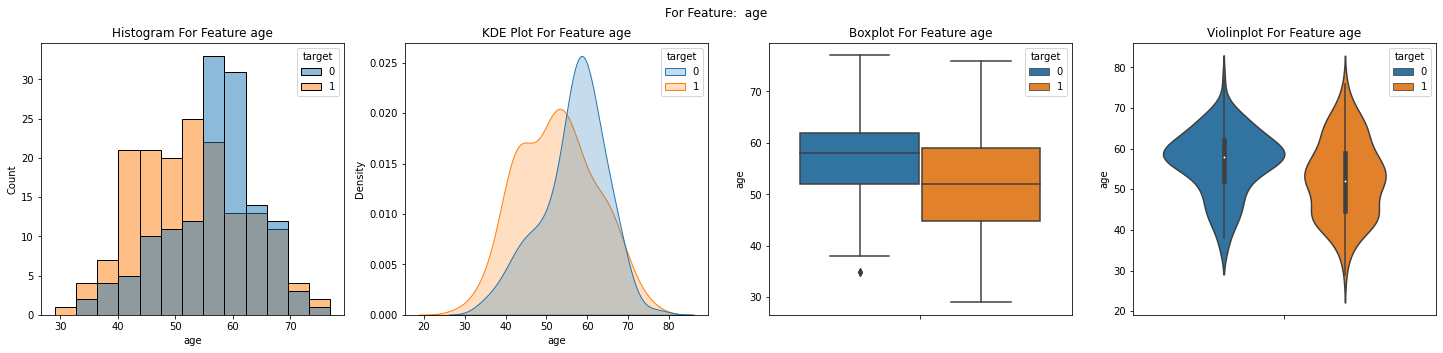

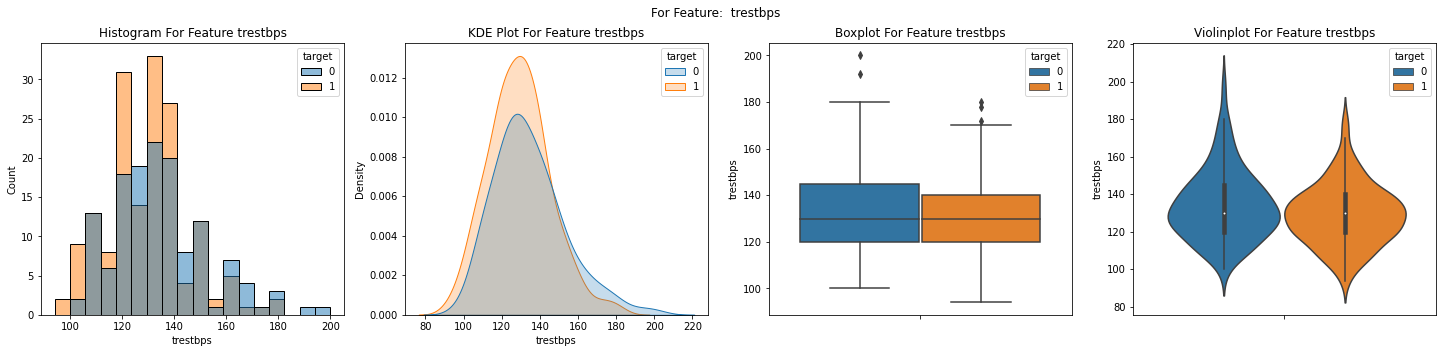

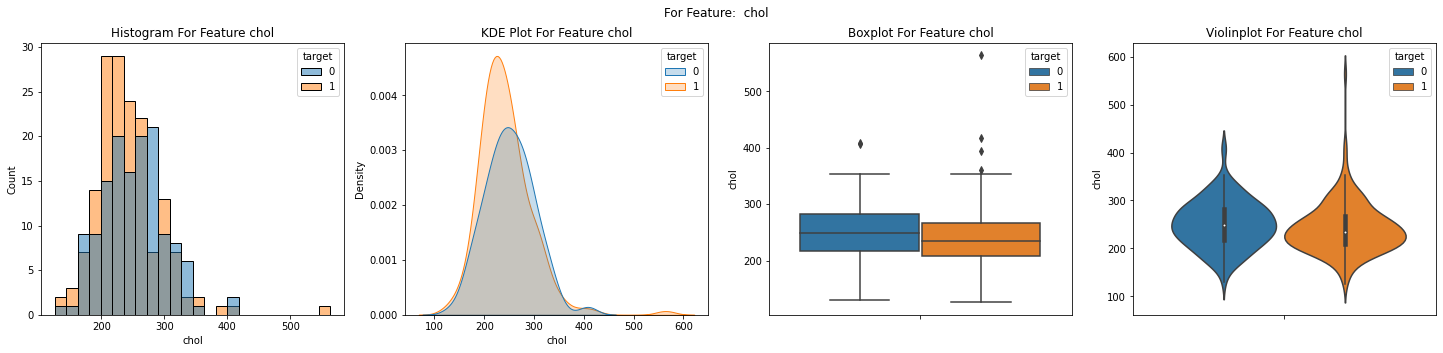

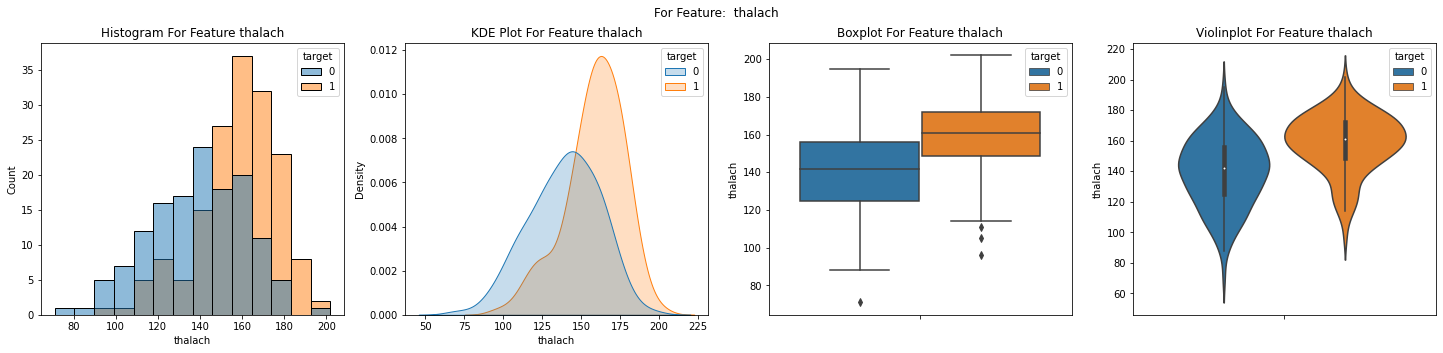

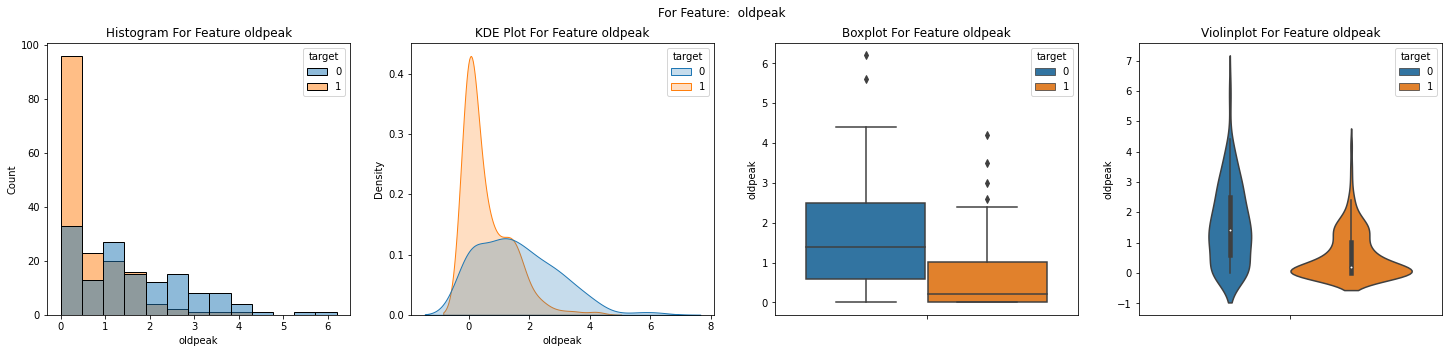

In [22]:
for col in num_cols:
    feature_dist_clas(df, col, "target")

In [23]:
def feature_distribution(df, col):
    
    skewness = np.round(df[col].skew(), 3)
    kurtosis = np.round(df[col].kurtosis(), 3)

    fig, axes = plt.subplots(1, 3, figsize = (18, 6))

    sns.kdeplot(data = df, x = col, fill = True, ax = axes[0], color = "orangered")
    sns.boxplot(data = df, y = col, ax = axes[1], color = "orangered")
    stats.probplot(df[col], plot = axes[2])

    axes[0].set_title("Distribution \nSkewness: " + str(skewness) + "\nKurtosis: " + str(kurtosis))
    axes[1].set_title("Boxplot")
    axes[2].set_title("Probability Plot")
    fig.suptitle("For Feature:  " + col)

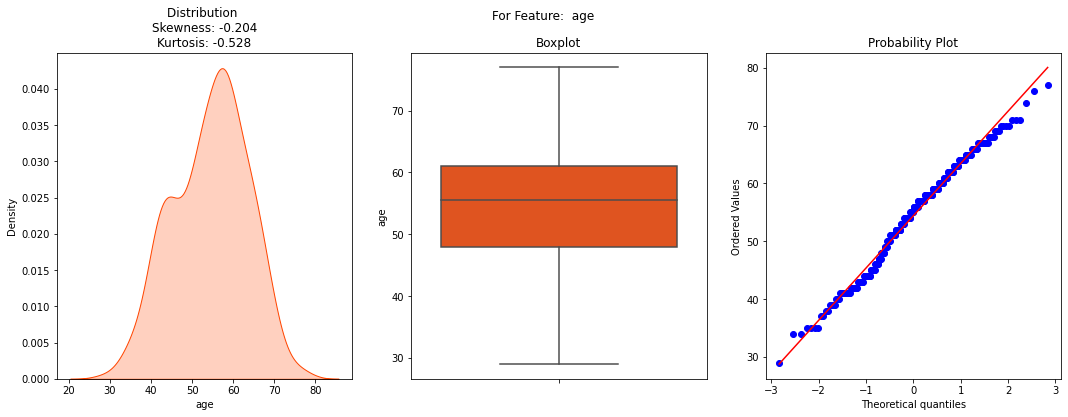

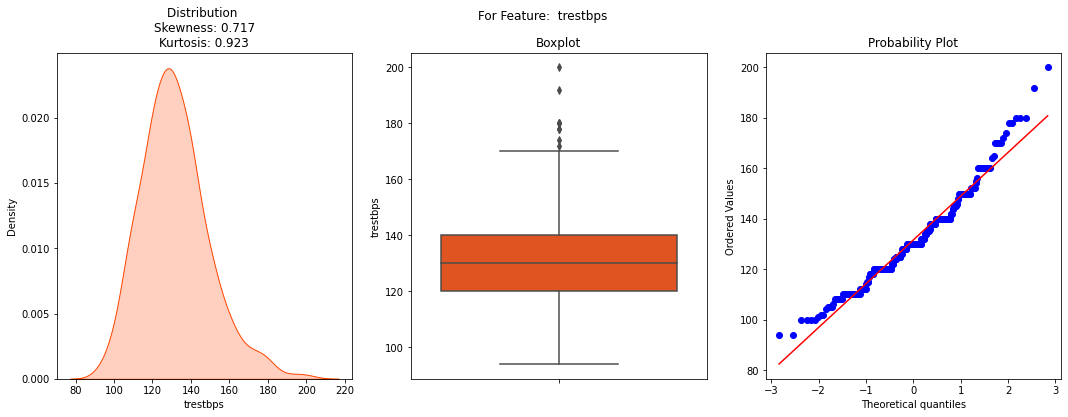

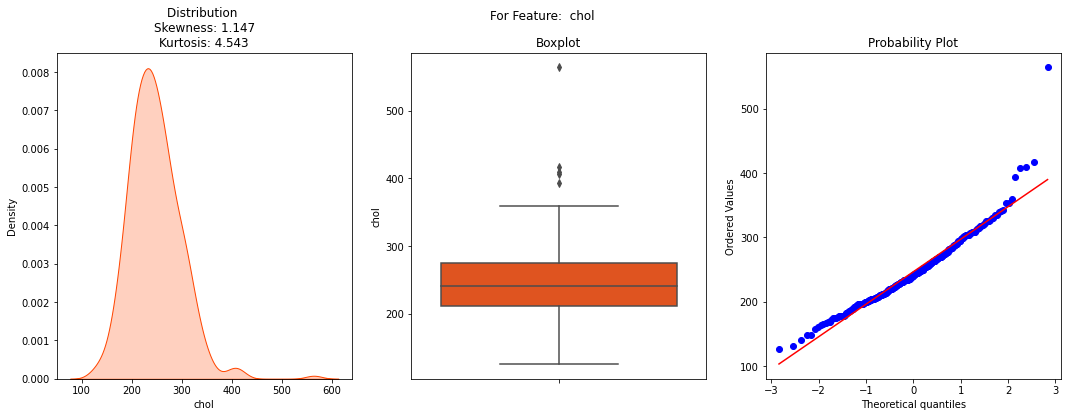

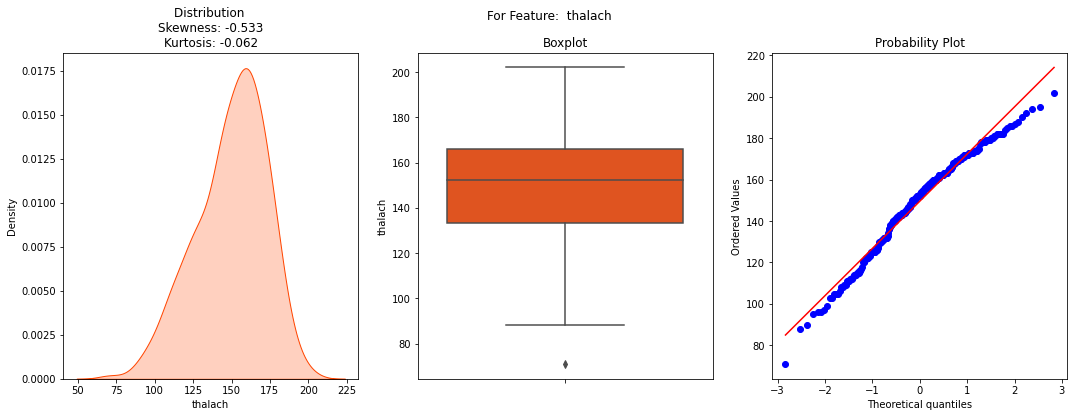

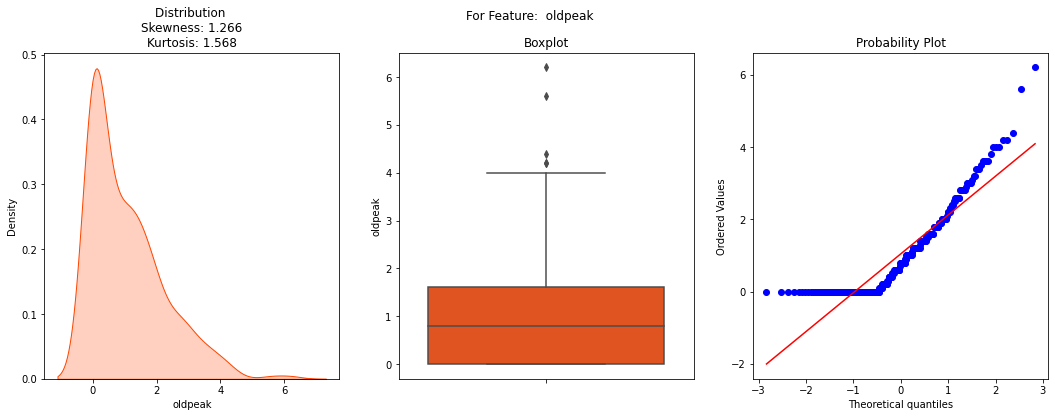

In [24]:
for col in num_cols:
    feature_distribution(df, col)

Age, thalachh and oldpeak would be useful variables.

trtbps, col and oldpeak have a few outliers. thalachh has just an outlier.

Our numerical variables generally have normal distribution except oldpeak. Also, outliers at chol feature are problem for this feature's normality.

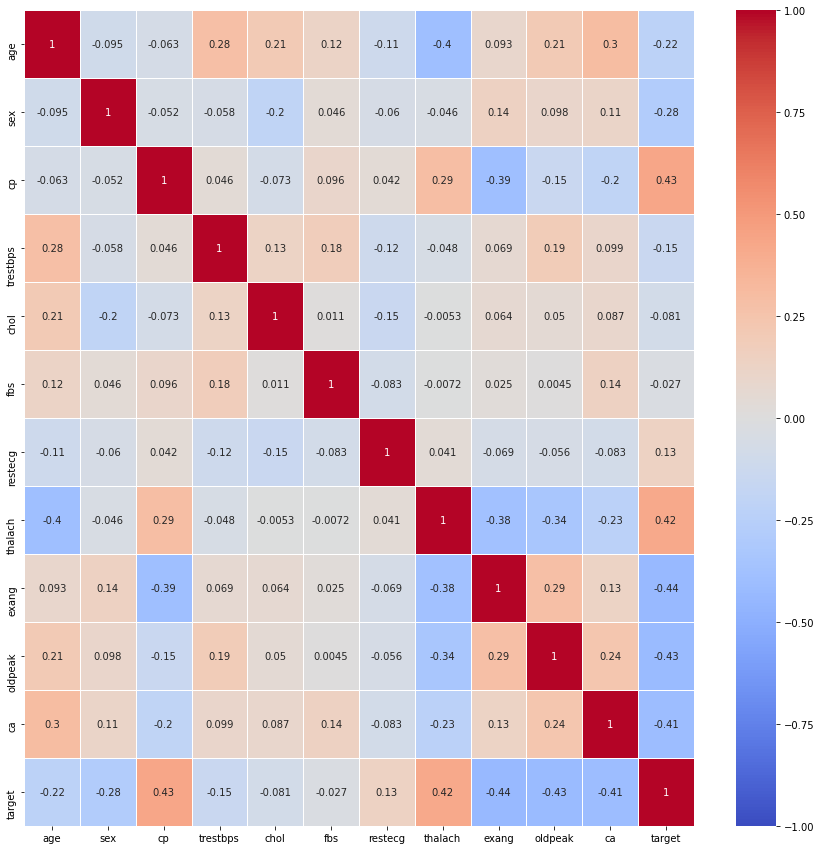

In [30]:
def heatmap(df):
    fig, ax = plt.subplots(figsize = (15, 15))
    sns.heatmap(df.corr(), cmap = "coolwarm", annot = True,
                vmin = -1, vmax = 1, linewidths = 0.5, cbar = True)
    
heatmap(df)

## Preprocessing

In [31]:
encode_cols = ["slope", "thal"]
dummies = pd.get_dummies(df[encode_cols], drop_first = True)
fin = pd.concat([df, dummies], axis = 1).drop(encode_cols, axis = 1)
fin

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,slope_flat,slope_upsloping,thal_fixed_effect,thal_normal,thal_reversable_defect
0,63,1,3,145,233,1,0,150,0,2.3,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,1,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,0,1,0,1,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,0,1,0,1,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,0,0,1,0,0,0,1
299,45,1,3,110,264,0,1,132,0,1.2,0,0,1,0,0,0,1
300,68,1,0,144,193,1,1,141,0,3.4,2,0,1,0,0,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,0,1,0,0,0,1


We have 302 observations, it means we have a small data. 25-75 or 30-70 is ideal for train test proportion.

In [50]:
target = "target"
predictors = [col for col in fin.columns if col != target]

X_train, X_test, y_train, y_test = train_test_split(fin[predictors],
                                                    fin[target],
                                                    test_size = 0.25,
                                                    random_state = 42)


def cv_model(model, X = X_train, y = y_train):
    return cross_val_score(model, X, y, scoring = "accuracy", n_jobs = -1).mean()

In [33]:
for col in num_cols:   
    scaler = StandardScaler()

    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1, 1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1, 1))

I just remove the variable __fbs__. It is a categorical feature that has two possibility(55% - 51%). It has lowest correlation as we can from heatmap.

In [34]:
X_train2 = X_train.drop("fbs", axis = 1)
X_test2 = X_test.drop("fbs", axis = 1)

## Models

In [42]:
logreg = LogisticRegression(random_state = 42)
svc = SVC(random_state=42, probability = True)
gnb = GaussianNB()
rfc = RandomForestClassifier(random_state = 42)
knnc = KNeighborsClassifier(n_jobs = -1)
lgbc = lgb.LGBMClassifier(random_state = 42, n_jobs = -1)
dtc = DecisionTreeClassifier(random_state = 42)


train_accuracy = {}
test_accuracy = {}


In [44]:
models = {
    "LogisticRegression": logreg,
    "SupportVectorMachine": svc,
    "GaussianNaiveBayes": gnb,
    "RandomForest": rfc,
    "KNN": knnc,
    "LightGBM": lgbc,
    "DecisionTree": dtc}
    


In [45]:
for name, model in models.items():
    
    model.fit(X_train2, y_train)
    train_preds = model.predict(X_train2)
    test_preds = model.predict(X_test2)
    
    train_accuracy[name] = accuracy_score(train_preds, y_train).round(4)
    test_accuracy[name] = accuracy_score(test_preds, y_test).round(4)
   

In [46]:
scores = pd.DataFrame([train_accuracy, test_accuracy], 
                      index = ["TrainAccuracy", "TestAccuracy"]).T

In [47]:
scores

,TrainAccuracy,TestAccuracy
LogisticRegression,0.8628,0.8816
SupportVectorMachine,0.8982,0.8947
GaussianNaiveBayes,0.8451,0.8816
RandomForest,1.0000,0.8816
KNN,0.8673,0.8816
LightGBM,1.0000,0.8289
DecisionTree,1.0000,0.8158


If we look at above table;

Linear classifiers achieves better results i.e Logistic Regression, SVM

Tree based algorithms have overfitting problem because we didn't tune hyperparameters.

Also, `Support Vector Classifier` has best test accuracy with nearly 90%



# Evaluation of Jaccard Index using Logistic Regression

If any body want to used different algorithm he/she can use it, to find Jaccard Index

In [52]:
yhat=logreg.predict(X_test2)

In [53]:
yhat

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [55]:
yhat_prob = logreg.predict_proba(X_test2)
yhat_prob

array([[0.96210673, 0.03789327],
       [0.72511327, 0.27488673],
       [0.2730567 , 0.7269433 ],
       [0.9544369 , 0.0455631 ],
       [0.04905098, 0.95094902],
       [0.08365801, 0.91634199],
       [0.48490374, 0.51509626],
       [0.96863867, 0.03136133],
       [0.98576528, 0.01423472],
       [0.27585424, 0.72414576],
       [0.46912898, 0.53087102],
       [0.8527753 , 0.1472247 ],
       [0.06234993, 0.93765007],
       [0.89526764, 0.10473236],
       [0.01386334, 0.98613666],
       [0.06842989, 0.93157011],
       [0.02115566, 0.97884434],
       [0.99537411, 0.00462589],
       [0.99130801, 0.00869199],
       [0.97348058, 0.02651942],
       [0.51728344, 0.48271656],
       [0.9582959 , 0.0417041 ],
       [0.67213197, 0.32786803],
       [0.23007437, 0.76992563],
       [0.08913025, 0.91086975],
       [0.44698302, 0.55301698],
       [0.9929156 , 0.0070844 ],
       [0.3672887 , 0.6327113 ],
       [0.9821242 , 0.0178758 ],
       [0.06988452, 0.93011548],
       [0.

In [57]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.8

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[36  5]
 [ 4 31]]


Confusion matrix, without normalization
[[36  5]
 [ 4 31]]


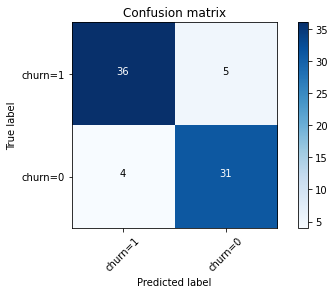

In [63]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

## Classification Report

In [64]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.90      0.88      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [69]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.3182914865924319

In [67]:
Logreg2 = LogisticRegression(C=0.01, solver='sag').fit(X_train2,y_train)
yhat_prob2 = Logreg2.predict_proba(X_test2)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))


LogLoss: : 0.46


# Thank You